- KEYWORDS: introduction


# Out[13]:

## DIGITAL SIGNAL PROCESSING FOR CHEMICAL ENGINEERS



-   A ***signal*** is any physical quantity that varies with time, space (location), or any other independent variables. This is a very broad definition. There are many natural signals. For example, Figure.ref:fig1 below shows a speech signal, which varies with time. An image is also a signal, which varies with space (location). In process engineering, measurements of various variables (e.g., temperatures, pressures), controller outputs are all signals that vary with time. In this course, we primarily focus on signals that vary with time - *time series signals*.
    
    ![img](./FiguresCHE573/speechsignal.png "Speach signal")

-   It is important to note that process signals typically contain a few components as described by the following equation:

$$y(t) = x(t) + n(t) +\delta(t)$$

where $y(t)$ is the measured signal, $x(t)$ denotes the true value of the signal, $n(t)$ denotes the measurement noise and $\delta(t)$ is the bias. One objective in signal processing is to recover $x(t)$ from the noisy $y(t)$.



### Continuous-time and discrete-time signals



-   **Continuous-time (CT)** signals are also called **analog signals**. CT signals are defined for every value of time and take values in a continuous interval $(a,b)$ where $a$ could be $-\infty$ and $b$ could be $\infty$. CT signals are functions of the continuous-time $t$. Two examples of CT signals are as follows:
    
    $$ \begin{array}{c}s_1(t)=5t,\\s_2(t)=20t^2\end{array}$$

-   **Discrete-time** (DT) signals are defined at specific values of time. Instead of using $t$, when describing DT signals, the index \`$n$' or \`$k$' in general is used to indicate the discrete-time instants.



#### Example



-   An example of a discrete-time signal is $x(n)$ defined as: 
    
    $$x(n) = \left\{\begin{array}{cc}0.8^n, & if\; n\geq 0 \\ 0, & otherwise\end{array}\right.$$
    
    The plot of $x(n)$ is shown in Figure below.



fig1
# Out[14]:

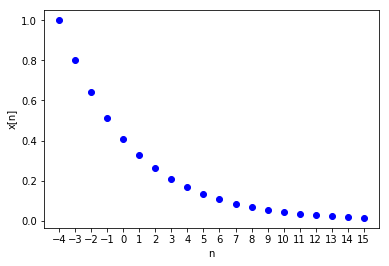

In [1]:
import pycse.orgmode as org
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math


n=np.linspace(-4,16,20)
x=np.zeros(len(n))

for i in range (0,len(n)):
      if i >= 0:
        x[i]=math.pow(0.8,i)
      else:
        x[i]=0

plt.xlabel('n')
plt.ylabel('x[n]')
plt.xticks(np.arange(-4, 16, step=1))
plt.plot(np.arange(-4, 16, 1),x,'bo')

org.figure(plt.savefig('./FiguresCHE573/figure1.png'),name='fig1',
           caption='Graphical representation of signal x(n) containing {} points'.format(len(x)),
           attributes=[('LATEX', ':width 3in'),
                       ('HTML', ':width 300'),
                       ('ORG', ':width 300')])

-   The relationship between $t$ and $n$ and $T$ is as follows:
    
    $$ t=nT\label{eq1}\tag{1}$$
    
    where $t$ is the continuous time, $n$ is the discrete time, and $T$ is the sampling time or sampling period (i.e., the actual time interval between two consecutive time instants). Relationship in Eq.ref:eq1 is very important in this course and will be discussed again.
    
    **Remark:** A discrete-time signal can be represented mathematically by a sequence of numbers.
    
    -   **Discrete-time** signals are obtained in the following two ways:
        -   By accumulating a variable over a period of time. The signal itself is discrete-time.
            -   Living expense per month is a DT signal;
            -   number of cars using a given street every hour is a DT signal;
            -   number of hours we work every week;
            -   number of alarms a process generates every hour.
        -   By selecting values of an analog signal at discrete-time instants. This process is called *sampling* and will be discussed later.
    
    -   $x(n)$ in Example can be obtained by sampling the following analog signal every 0.5 second:
        
        $$ x_c(t) = \left\{\begin{array}{cc}0.8^{2t}, & if\; t\geq 0 \\ 0, & otherwise\end{array}\right.$$
        
        For this example, the sampling time is $T=0.5$ second. According to ref:eq1, $t=nT=0.5n$. This implies that $x(n)=x_c(t)|_{t=nT=0.5n}$. For example, $x(0)=x_c(0)=1$, $x(1)=x_c(0.5)=0.8$.
    
    -   Discrete-time signals can be further divided into two classes of signals:
        -   **Continuous-valued discrete-time signals**. The signals can take on all possible values in a finite or infinite range.
            **Example:**    The precipitation every month is a continuous-valued discrete-time signal.
        -   **Discrete-valued discrete-time signals**. The signals take on values from a finite set of possible values. *A discrete-time signal having a set of discrete values is called a digital signal.* In order for a signal to be processed digitally (by a computer), it must be a digital signal. An analog signal can be first sampled to obtain a discrete-time signal. The resulting discrete-time signal can be converted to a digital signal by quantizing its values to a set of discrete values. This process is called `quantization`. The difference between the analog signal and the digital signal is called the approximation or quantization error. In a digital computer, in general 16 or more bits are used to represent a number which provide more than 65,536 values for quantizing. For most of the engineering practice, quantization error can be neglected. In this course, we will focus on digital signals but we do not explicitly consider the quantization of the values.
    
    -   If the allowable signal values are $0, 0.1, 0.2, \ldots, 0.9, 1$, $x(n)$ in  above Example can be converted to a digital signal shown in Figure ref:fig1 by truncation. For example, $x(8)=0.1678$ will be approximated by the value 0.1. If rounding is used, $x(8)$ will be approximated by 0.2.



fig2
# Out[15]:

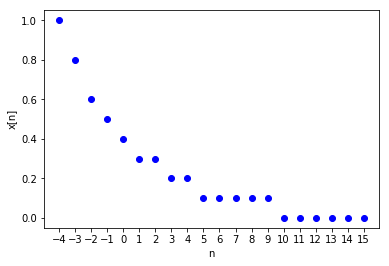

In [1]:
import pycse.orgmode as org
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math


n=np.linspace(-4,16,20)
x=np.zeros(len(n))

for i in range (0,len(n)):
      if i >= 0:
        x[i]=round(math.pow(0.8,i),1)
      else:
        x[i]=0

plt.xlabel('n')
plt.ylabel('x[n]')
plt.xticks(np.arange(-4, 16, step=1))
plt.plot(np.arange(-4, 16, 1),x,'bo')

org.figure(plt.savefig('./FiguresCHE573/figure2.png'),name='fig2',
           caption='Graphical representation of digital signal x(n) containing {} points'.format(len(x)),
           attributes=[('LATEX', ':width 3in'),
                       ('HTML', ':width 300'),
                       ('ORG', ':width 300')])

-   The above classification can be summarized as follows:
    
    $$Signals\left\{\begin{array}{l}Continuous-time\; signals\;(analog\; signals)\\    Discrete-time\; signals\left\{\begin{array}{l}Continuous-valued \;discrete-time\; signals\\ Discrete-valued\; discrete-time\;signals\; (digital\;signals)\end{array}\right.\end{array}\right.$$



#### Random and deterministic signals



-   The mathematical analysis and processing of signals requires the availability of mathematical description for the signal itself. This mathematical description, often referred to as the *signal model*, leads to another important classification of signals.
    -   Any signals that can be uniquely described by an explicit mathematical expression, a table of data, or a well-defined rule is called *deterministic*. This term is used to emphasize the fact that all the past, present, and future values of the signal are known precisely, without any uncertainty.
    
    -   Example: Signals $s_1$, $s_2$, $s_3$, $x$, $x_c$ mentioned earlier in this section are deterministic signals.
    
    -   In many practical applications, however, there are signals that evolve in time in an unpredictable manner. We refer to these signals as *random*. The best approach is to analyze these *random* signals using statistical techniques.
    
    -   Example: Among the example signals mentioned earlier, the following could be random signals:
        -   living expense per month;
        -   number of cars using a given street every hour;
        -   the precipitation every month.
    
    -   Example: Many signals in process control have characteristics of random signals. For example, wind velocity at electric turbines, wind direction for flare dispersion, $\cdots$.
    
    -   The signal in Figure is actually a discrete-time signal. Because there are too many samples (1000 in this case) with small sampling time (0.001 in this case), it is not effective to show the values in terms of sample numbers like in Figure ref:fig1 or Figure ref:fig2. It is more practical to treat the signal as a \`continuous-time' signal and to graphically represent its evolution with time.



fig3
# Out[16]:

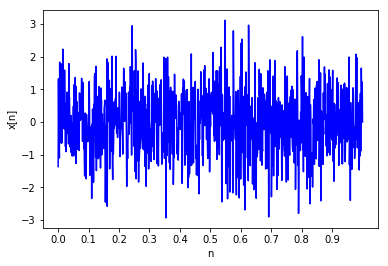

In [1]:
import pycse.orgmode as org
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

n=np.linspace(0,1,1000)
x=np.zeros(len(n))

for i in range (0,len(n)-1):
    x[i]=np.random.randn()

plt.xlabel('n')
plt.ylabel('x[n]')
plt.xticks(np.arange(0, 1, step=0.1))
plt.plot(n,x,'b-')

org.figure(plt.savefig('./FiguresCHE573/figure3.png'),name='fig3',
           caption='Graphical representation of digital signal x(n) containing {} points'.format(len(x)),
           attributes=[('LATEX', ':width 3in'),
                       ('HTML', ':width 300'),
                       ('ORG', ':width 300')])

-   In this course, we will focus on *stationary* random signals. In mathematics, a stationary signal is a signal whose joint probability distribution does not change when shifted in time. In a less strict sense, we can treat signals whose characteristics (e.g., *mean, variance*) do not change over time as stationary.
    -   Keep in mind that *analyzing signals* is a very important component of this course. Other important components include *analyzing systems* and *design filters*. Regarding signals, in process control and engineering applications, random signals are very common.  *The analysis of random signals will be one of the few points of interest in this course*. A strategy used in this course is that we will introduce the fundamental theories (like *sampling theorem, aliasing, Fourier series, Fourier transform*) based on deterministic signals due to their simplicity. When discussing applications of the theories, we will focus on random signals (including *autocorrelation function, filtering*).



## Energy and power signals



-   When we discuss Fourier transform in the second half of this course, we will introduce power spectrum and energy spectrum of signals. In order to better understand these concepts, we introduce the classification of energy and power signals. First, we introduce the definitions of energy and power of a signal.
    
    -   The **energy** of a signal $x(n)$ is defined as:
    
    $$E \equiv \sum\limits_{n=-\infty}^{\infty} |x(n)|^2$$
    
    which is the summation of the squares of the magnitude of a signal at different instants. If we define the expression
    
    $$E_N= \sum\limits_{n=-N}^{N} |x(n)|^2$$
    
    then signal energy is 
    
    $$E= \lim\limits_{N\rightarrow \infty} E_N$$

-   The energy of a signal could be finite or infinite. In general, the energy of a signal with finite non-zero values is finite and the energy of a signal with infinite non-zero values is infinite. Many signals posses infinite energy but have a finite average power.

-   The average  **power** of a signal $x(n)$ is defined as:

$$P\equiv \lim_{N\rightarrow\infty}\dfrac{1}{2N+1}\sum\limits_{n=-N}^N |x(n)|^2$$

which is the average of the energy of the signal over the entire time range. In general, the power of a signal is finite. When the energy of a signal is finite, its power is 0.

-   When the energy of a signal is finite, the signal is called an *energy signal*. The power of an energy signal is 0.

-   If the power of a signal $P\neq 0$ but finite, then the signal is called a *power signal*. The energy of a power signal is infinite.



## Some Elementary DT Signals and representation



-   In signal processing, there are a number of basic signals. These signals play an important role in the analysis of DT signals. These signals include {\em unit sample signal, unit step signal, sinusoidal signals, exponential signals} etc. One may notice that these signals are also widely used in process control.



### The unit sample signal



-   The *unit sample signal* (or called *unit impulse signal*) has a nonzero value (1) when $n$ is zero and has zero value at all the other instants. In this course, we will use $\delta(n)$ to denote the unit sample signal. It is defined mathematically as follows:
    
    $$\delta(n)=\left\{\begin{array}{cc}1, & if\; n=0 \\ 0, & if\; n\neq 0\end{array}\right.$$
    
    **Remark:** Recall that in the process control course, in the continuous-time domain, *unit impulse* is defined as a signal such that:
    
    $$\int_{t=0^-}^{t=0^+} \delta(t) dt = 1$$



fig4
# Out[17]:
: [<matplotlib.lines.Line2D at 0x108356950>]

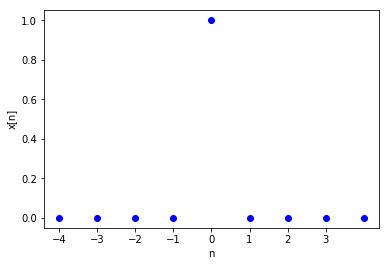

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math


n=np.linspace(-4,4,9)
x=np.zeros(len(n))

for i in range (0,len(n)-1):
      if  n[i]== 0:
        x[i]=1
      else:
        x[i]=0

plt.xlabel('n')
plt.ylabel('x[n]')
plt.xticks(np.arange(-4, 4, step=1))
plt.plot(n,x,'bo')

### The unit step signal



-   The *unit step signal* has a value one when $n$ is equal to or greater than zero and has zero value at all the other instants. In this course, we will use $u(n)$ to denote the unit step signal. It is defined mathematically as follows:
    
    $$u(n)=\left\{\begin{array}{cc}1, & if\; n\geq0 \\ 0, & if\; n<0\end{array}\right.$$
    
    **Remark:** Recall that in the process control course, in the continuous-time domain, *unit step* is defined similarly but for time $t$:
    
    $$u(t)=\left\{\begin{array}{cc}1, & if\; t\geq0 \\ 0, & if\; t<0\end{array}\right.$$



fig5
# Out[18]:
: [<matplotlib.lines.Line2D at 0x10881f950>]

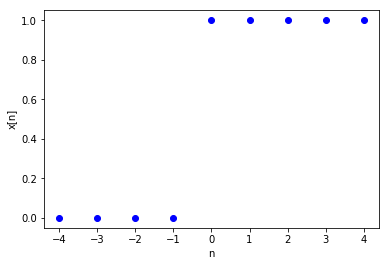

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math


n=np.linspace(-4,4,9)
x=np.zeros(len(n))

for i in range (0,len(n)):
      if  n[i]>= 0:
        x[i]=1
      else:
        x[i]=0

plt.xlabel('n')
plt.ylabel('x[n]')
plt.xticks(n)
plt.plot(n,x,'bo')

### The unit ramp signal



-   The *unit ramp signal* is defined mathematically as follows:
    
    $$u_r(n)=\left\{\begin{array}{cc}n, & if\; n\geq0 \\ 0, & if\; n<0\end{array}\right.$$



fig6
# Out[19]:
: [<matplotlib.lines.Line2D at 0x108984150>]

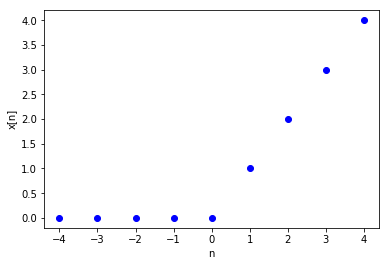

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math


n=np.linspace(-4,4,9)
x=np.zeros(len(n))

for i in range (0,len(n)):
      if  n[i]>= 0:
        x[i]=n[i]
      else:
        x[i]=0

plt.xlabel('n')
plt.ylabel('x[n]')
plt.xticks(n)
plt.plot(n,x,'bo')

### The exponential signal



-   The *exponential signal* is defined mathematically as follows:
    
    $$u_r(n)=a^n,\;\;\;\forall n$$
    
    -   The representation of signals can be:
        -   Functional representation
        -   Tabular representation
        -   Sequence representation
    
    -   Signals can be symmetric (even) and antisymmetric (odd) signals. A signal is symmetric if $x(-n)=x(n)$ and antisymmetric if $x(-n)=-x(n)$. A signal $x(n)$ may be shifted in time by replacing the independent variable $n$ by $n-k$, where $k$ is an integer. If $k$ is a positive integer, the time shift results in a delay of the signal by $k$ units of time. If $k$ is a negative integer, the time shift results in advance of the signal by $k$ units in time.
    
    -   In the discrete signals, operations are associated with the index of the sequence, for given $n$ one can have:
    
    $$\begin{array}{ccc}x(n+1)&=&\left\{x(1),x(2),x(3),\cdots,x(n+1),\cdots\right\}\\x(n)&=&\left\{x(0),x(1),x(2),\cdots,x(n),\cdots\right\}\\x(n-1)&=&\left\{x(-1),x(0),x(1),\cdots,x(n-1),\cdots\right\}\end{array}$$
    
    **Remark:** The algebraic operations of summation, multiplication and subtraction are defined among signals which the same sampling instance $n$, (for example, that is $x_1(n)+x_2(n)\mapsto x_3(n)$). When it comes to defining and relating the discrete signals of different time instances, we need to introduce time shift operators, forward shift and backward shift operators, which can be presented as operators operating on the index of the signal.

![img](./FiguresCHE573/ditaa-backshift.png)



fig8
# Out[20]:
: <matplotlib.legend.Legend at 0x1086c3c50>

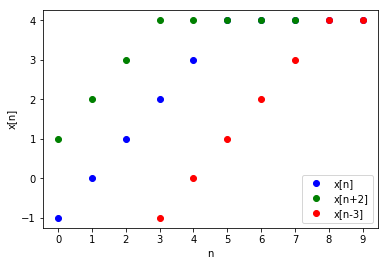

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math


n=np.arange(0,10,1)
x=np.zeros(len(n))
xm3=np.ones(len(n))*np.nan
xp2=np.ones(len(n))*np.nan

for i in range (0,len(n)):
    if n[i]<=5:
        x[i]=n[i]-1
    else:
        x[i]=4
        
for i in range (0,len(n)):
    if i>=3:
        xm3[i]=x[i-3]
    if i<=len(n)-1-2:
        xp2[i]=x[i+2]
plt.xlabel('n')
plt.ylabel('x[n]')
plt.xticks(n)
plt.plot(n,x,'bo',n,xp2,'go',n,xm3,'ro')
plt.legend(['x[n]','x[n+2]','x[n-3]'],loc='lower right')

### Properties of unit sample and step signals



-   The unit sample and unit step signals are very important elementary signals. They have the following properties. Note that in the following description, $\{x(n)\}$ denotes the sequence of values of $x(n)$ for all possible $n$.
    
    -   $\delta(n)=u(n)-u(n-1)$
    -   $u(n)=\sum\limits_{m=0}^n\delta(m)$
    -   Multiplying any signal by a unit sample selects or \`sift' out the value of the signal at the instant of the impulse (sampling) such that:
        
        $$ \begin{array}{c}\{x(n)\}\cdot \delta(n) = x(0)\\\{x(n)\}\cdot \delta(n-k) = x(k)\end{array}$$
    
    -   Any sequence $x(n)$ can be expressed as the linear combination of shifted impulses such that:
        
        $$x(n) = \sum\limits_{k=-\infty}^{\infty}x(k)\delta(n-k)$$
    
    -   The energy of the unit sample signal is 1 and the power of the unit sample signal is 0
    
    $$\begin{array}{l}E_{\delta}=\sum\limits_{n=-\infty}^{\infty} |\delta(n)|^2=\ldots + 0 + 1 + 0 + \ldots = 1\\P_{\delta}=\displaystyle\lim_{N\rightarrow\infty}\dfrac{1}{2N+1}\cdot 1 = 0\end{array}$$
    
    -   The energy of the unit step signal is $\infty$ and the power of the unit step signal is $\dfrac{1}{2}$
    
    $$\begin{array}{l}E_{u}=\sum\limits_{n=-\infty}^{\infty} |u(n)|^2=\ldots + 0 + 1 + 1 + \ldots = \infty\\P_{u}=\displaystyle\lim_{N\rightarrow\infty}\dfrac{1}{2N+1}\sum\limits_{n=-N}^N|u(n)|^2 = \lim_{N\rightarrow\infty}\dfrac{N+1}{2N+1}=\dfrac{1}{2}\end{array}$$



## Summary



-   We introduce signals (continuous and discrete), signal energy and power, sampling and some basic signal functions



## Followup actions



-   Run the python code and change parameters in the sampling of continuous to digital signal

